In [3]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras import initializers
from keras.optimizers import SGD
from tensorflow import keras
from keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split

In [5]:
train,test,valid={},{},{}
(train["x"], train["y"]), (test["x"], test["y"]) = mnist.load_data()

In [6]:
num_labels = len(np.unique(train["y"]))
train["y"] = to_categorical(train["y"])
test["y"] = to_categorical(test["y"])
input_size = train["x"].shape[1]*train["x"].shape[1]
train["x"] = np.reshape(train["x"],[-1,input_size])
test["x"] = np.reshape(test["x"],[-1,input_size])
train["x"] = train["x"].astype('float32')/255
test["x"] = test["x"].astype('float32')/255
train["x"], valid["x"], train["y"], valid["y"]=train_test_split(train["x"], train["y"], test_size=0.3, random_state=42)
print(train["x"].shape)
print(train["y"].shape)
print(test["x"].shape)
print(test["y"].shape)
print(valid["x"].shape)
print(valid["y"].shape)

(42000, 784)
(42000, 10)
(10000, 784)
(10000, 10)
(18000, 784)
(18000, 10)


In [8]:
def loss_plot(History, epochs):
    N = np.arange(0, epochs)
    plt.plot(N, History.history["loss"], label="train_loss")
    plt.title("Training Loss vs epochs")
    plt.xlabel("Number of Epoch")
    plt.ylabel("Loss")

In [9]:
batch_Size = 128
class ANN:
    def MLP(self,input_dim,kinit='glorot_normal'): 
        self.dropout = 0.45
        self.model = Sequential()
        self.model.add(Dense(256, input_dim = input_dim, kernel_initializer=kinit))
        self.model.add(Activation('relu'))
        self.model.add(Dropout(self.dropout))
        self.model.add(Dense(256,kernel_initializer=kinit))
        self.model.add(Activation('relu'))
        self.model.add(Dropout(self.dropout))
        self.model.add(Dense(10))
        self.model.add(Activation('softmax'))
        return self.model

# part 1

## 1. Experiment with different optimizers

# **adam optimizer**

In [10]:
obj = ANN()
input_dim=train["x"].shape[1]
model1=obj.MLP(input_dim)
loss_1='categorical_crossentropy'
opt='adam'
model1.compile(loss=loss_1, optimizer=opt, metrics=['accuracy'])
history1 = model1.fit(train["x"],train["y"],epochs = 10, batch_size = batch_Size, validation_data = (valid["x"],valid["y"]))

Epoch 1/10
329/329 [==============================] - 4s 4ms/step - loss: 0.8572 - accuracy: 0.7225 - val_loss: 0.1866 - val_accuracy: 0.9445
Epoch 2/10
329/329 [==============================] - 1s 3ms/step - loss: 0.2437 - accuracy: 0.9269 - val_loss: 0.1307 - val_accuracy: 0.9611
Epoch 3/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1788 - accuracy: 0.9462 - val_loss: 0.1134 - val_accuracy: 0.9658
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1448 - accuracy: 0.9551 - val_loss: 0.1010 - val_accuracy: 0.9702
Epoch 5/10
329/329 [==============================] - 1s 3ms/step - loss: 0.1248 - accuracy: 0.9621 - val_loss: 0.0912 - val_accuracy: 0.9733
Epoch 6/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1151 - accuracy: 0.9651 - val_loss: 0.0924 - val_accuracy: 0.9721
Epoch 7/10
329/329 [==============================] - 1s 3ms/step - loss: 0.1057 - accuracy: 0.9675 - val_loss: 0.0848 - val_accuracy: 0.9748
Epoch 

Test accuracy:  97.8600025177002


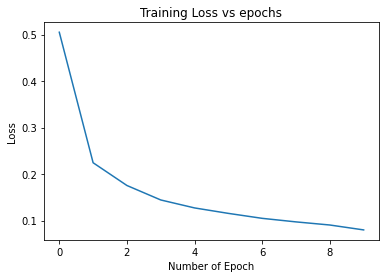

In [11]:
_,acc1 = model1.evaluate(test["x"],test["y"],batch_size = 128, verbose=0)
print("Test accuracy: ",acc1*100)
loss_plot(history1,10)

# **RMSprop optimizer**

In [12]:
obj1 = ANN()
input_dim=train["x"].shape[1]
model2=obj1.MLP(input_dim)
loss_1='categorical_crossentropy'
opt='RMSprop'
model2.compile(loss=loss_1, optimizer=opt, metrics=['accuracy'])
history1 = model2.fit(train["x"], train["y"], epochs = 10, batch_size = 128, validation_data = (valid["x"],valid["y"]))

Epoch 1/10
329/329 [==============================] - 2s 4ms/step - loss: 0.7342 - accuracy: 0.7671 - val_loss: 0.1967 - val_accuracy: 0.9413
Epoch 2/10
329/329 [==============================] - 1s 4ms/step - loss: 0.2373 - accuracy: 0.9291 - val_loss: 0.1365 - val_accuracy: 0.9594
Epoch 3/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1795 - accuracy: 0.9480 - val_loss: 0.1184 - val_accuracy: 0.9650
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1533 - accuracy: 0.9556 - val_loss: 0.1084 - val_accuracy: 0.9681
Epoch 5/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1290 - accuracy: 0.9606 - val_loss: 0.1036 - val_accuracy: 0.9719
Epoch 6/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1198 - accuracy: 0.9654 - val_loss: 0.1051 - val_accuracy: 0.9712
Epoch 7/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1077 - accuracy: 0.9674 - val_loss: 0.1003 - val_accuracy: 0.9744
Epoch 

Test accuracy:  97.54999876022339


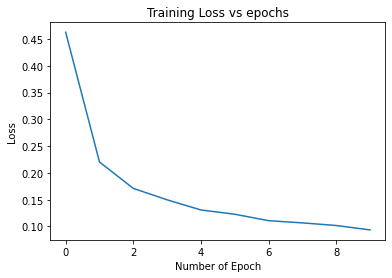

In [13]:
_,acc2 = model2.evaluate(test["x"],test["y"],batch_size = batch_Size, verbose=0)
print("Test accuracy: ",acc2*100)
loss_plot(history1,10)

# **SGD with momentum**

In [14]:
obj1 = ANN()
input_dim=train["x"].shape[1]
model2=obj1.MLP(input_dim)
loss_1='categorical_crossentropy'
opt=SGD(momentum = 0.7)
model2.compile(loss=loss_1, optimizer=opt, metrics=['accuracy'])
history1 = model2.fit(train["x"], train["y"], epochs = 10, batch_size = 128, validation_data = (valid["x"],valid["y"]))

Epoch 1/10
329/329 [==============================] - 2s 4ms/step - loss: 1.6042 - accuracy: 0.4612 - val_loss: 0.4583 - val_accuracy: 0.8805
Epoch 2/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6018 - accuracy: 0.8134 - val_loss: 0.3361 - val_accuracy: 0.9046
Epoch 3/10
329/329 [==============================] - 1s 4ms/step - loss: 0.4687 - accuracy: 0.8604 - val_loss: 0.2861 - val_accuracy: 0.9179
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.3952 - accuracy: 0.8834 - val_loss: 0.2537 - val_accuracy: 0.9264
Epoch 5/10
329/329 [==============================] - 1s 4ms/step - loss: 0.3567 - accuracy: 0.8926 - val_loss: 0.2311 - val_accuracy: 0.9310
Epoch 6/10
329/329 [==============================] - 1s 4ms/step - loss: 0.3197 - accuracy: 0.9041 - val_loss: 0.2126 - val_accuracy: 0.9367
Epoch 7/10
329/329 [==============================] - 1s 4ms/step - loss: 0.2975 - accuracy: 0.9128 - val_loss: 0.1964 - val_accuracy: 0.9413
Epoch 

Test accuracy:  95.34000158309937


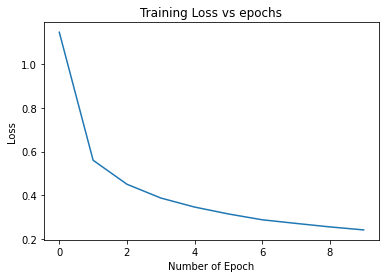

In [15]:
_,acc2 = model2.evaluate(test["x"],test["y"],batch_size = batch_Size, verbose=0)
print("Test accuracy: ",acc2*100)
loss_plot(history1,10)

# **SGD without momentum**

In [16]:
obj1 = ANN()
input_dim=train["x"].shape[1]
model2=obj1.MLP(input_dim)
loss_1='categorical_crossentropy'
opt=SGD(momentum = 0.0)
model2.compile(loss=loss_1, optimizer=opt, metrics=['accuracy'])
history1 = model2.fit(train["x"], train["y"], epochs = 10, batch_size = 128, validation_data = (valid["x"],valid["y"]))

Epoch 1/10
329/329 [==============================] - 2s 4ms/step - loss: 2.0851 - accuracy: 0.2661 - val_loss: 1.0152 - val_accuracy: 0.7909
Epoch 2/10
329/329 [==============================] - 1s 4ms/step - loss: 1.1244 - accuracy: 0.6505 - val_loss: 0.6009 - val_accuracy: 0.8524
Epoch 3/10
329/329 [==============================] - 1s 4ms/step - loss: 0.7946 - accuracy: 0.7530 - val_loss: 0.4728 - val_accuracy: 0.8742
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6608 - accuracy: 0.7951 - val_loss: 0.4112 - val_accuracy: 0.8864
Epoch 5/10
329/329 [==============================] - 1s 3ms/step - loss: 0.5918 - accuracy: 0.8196 - val_loss: 0.3740 - val_accuracy: 0.8946
Epoch 6/10
329/329 [==============================] - 1s 3ms/step - loss: 0.5267 - accuracy: 0.8398 - val_loss: 0.3459 - val_accuracy: 0.9019
Epoch 7/10
329/329 [==============================] - 1s 3ms/step - loss: 0.4912 - accuracy: 0.8532 - val_loss: 0.3240 - val_accuracy: 0.9072
Epoch 

Test accuracy:  92.18999743461609


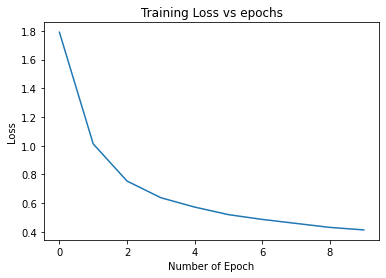

In [17]:
_,acc2 = model2.evaluate(test["x"],test["y"],batch_size = batch_Size, verbose=0)
print("Test accuracy: ",acc2*100)
loss_plot(history1,10)

## 2. Experiment with different weight initialisation  

### 2.(a) Xavier weight initialization

In [18]:
obj1 = ANN()
input_dim=train["x"].shape[1]
model2=obj1.MLP(input_dim,'glorot_normal')
loss_1='categorical_crossentropy'
opt=SGD(momentum = 0.0)
model2.compile(loss=loss_1, optimizer=opt, metrics=['accuracy'])
history1 = model2.fit(train["x"], train["y"], epochs = 10, batch_size = 128, validation_data = (valid["x"],valid["y"]))

Epoch 1/10
329/329 [==============================] - 2s 4ms/step - loss: 2.0801 - accuracy: 0.2659 - val_loss: 0.9908 - val_accuracy: 0.7937
Epoch 2/10
329/329 [==============================] - 1s 4ms/step - loss: 1.1118 - accuracy: 0.6605 - val_loss: 0.5892 - val_accuracy: 0.8469
Epoch 3/10
329/329 [==============================] - 1s 3ms/step - loss: 0.7904 - accuracy: 0.7548 - val_loss: 0.4690 - val_accuracy: 0.8729
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6573 - accuracy: 0.7943 - val_loss: 0.4101 - val_accuracy: 0.8862
Epoch 5/10
329/329 [==============================] - 1s 3ms/step - loss: 0.5927 - accuracy: 0.8197 - val_loss: 0.3729 - val_accuracy: 0.8946
Epoch 6/10
329/329 [==============================] - 1s 4ms/step - loss: 0.5328 - accuracy: 0.8394 - val_loss: 0.3475 - val_accuracy: 0.9021
Epoch 7/10
329/329 [==============================] - 1s 4ms/step - loss: 0.4991 - accuracy: 0.8501 - val_loss: 0.3257 - val_accuracy: 0.9071
Epoch 

Test accuracy:  92.00999736785889


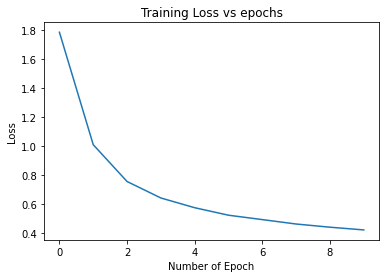

In [19]:
_,acc2 = model2.evaluate(test["x"],test["y"],batch_size = batch_Size, verbose=0)
print("Test accuracy: ",acc2*100)
loss_plot(history1,10)

# **Uniform weight initialization**

In [20]:
obj1 = ANN()
input_dim=train["x"].shape[1]
model2=obj1.MLP(input_dim,'uniform')
loss_1='categorical_crossentropy'
opt=SGD(momentum = 0.0)
model2.compile(loss=loss_1, optimizer=opt, metrics=['accuracy'])
history1 = model2.fit(train["x"], train["y"], epochs = 10, batch_size = 128, validation_data = (valid["x"],valid["y"]))

Epoch 1/10
329/329 [==============================] - 2s 4ms/step - loss: 2.1839 - accuracy: 0.2540 - val_loss: 1.4337 - val_accuracy: 0.7537
Epoch 2/10
329/329 [==============================] - 1s 4ms/step - loss: 1.3320 - accuracy: 0.6376 - val_loss: 0.7136 - val_accuracy: 0.8353
Epoch 3/10
329/329 [==============================] - 1s 4ms/step - loss: 0.8406 - accuracy: 0.7425 - val_loss: 0.5325 - val_accuracy: 0.8639
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6726 - accuracy: 0.7949 - val_loss: 0.4516 - val_accuracy: 0.8801
Epoch 5/10
329/329 [==============================] - 1s 4ms/step - loss: 0.5812 - accuracy: 0.8236 - val_loss: 0.4057 - val_accuracy: 0.8899
Epoch 6/10
329/329 [==============================] - 1s 4ms/step - loss: 0.5292 - accuracy: 0.8411 - val_loss: 0.3729 - val_accuracy: 0.8970
Epoch 7/10
329/329 [==============================] - 1s 4ms/step - loss: 0.4911 - accuracy: 0.8543 - val_loss: 0.3498 - val_accuracy: 0.9016
Epoch 

Test accuracy:  91.76999926567078


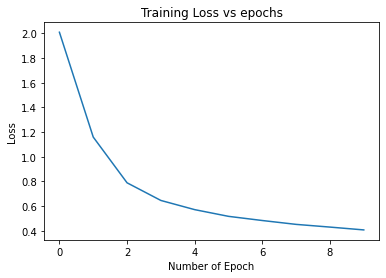

In [21]:
_,acc2 = model2.evaluate(test["x"],test["y"],batch_size = batch_Size, verbose=0)
print("Test accuracy: ",acc2*100)
loss_plot(history1,10)

# **Normal weight initialization**

In [22]:
obj1 = ANN()
input_dim=train["x"].shape[1]
model2=obj1.MLP(input_dim,'normal')
loss_1='categorical_crossentropy'
opt=SGD(momentum = 0.0)
model2.compile(loss=loss_1, optimizer=opt, metrics=['accuracy'])
history1 = model2.fit(train["x"], train["y"], epochs = 10, batch_size = 128, validation_data = (valid["x"],valid["y"]))

Epoch 1/10
329/329 [==============================] - 2s 4ms/step - loss: 2.1156 - accuracy: 0.2535 - val_loss: 1.1034 - val_accuracy: 0.7876
Epoch 2/10
329/329 [==============================] - 1s 4ms/step - loss: 1.1798 - accuracy: 0.6452 - val_loss: 0.6305 - val_accuracy: 0.8428
Epoch 3/10
329/329 [==============================] - 1s 4ms/step - loss: 0.8233 - accuracy: 0.7414 - val_loss: 0.4953 - val_accuracy: 0.8664
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6876 - accuracy: 0.7873 - val_loss: 0.4284 - val_accuracy: 0.8816
Epoch 5/10
329/329 [==============================] - 1s 4ms/step - loss: 0.6144 - accuracy: 0.8078 - val_loss: 0.3861 - val_accuracy: 0.8921
Epoch 6/10
329/329 [==============================] - 1s 4ms/step - loss: 0.5562 - accuracy: 0.8324 - val_loss: 0.3573 - val_accuracy: 0.8986
Epoch 7/10
329/329 [==============================] - 1s 4ms/step - loss: 0.5158 - accuracy: 0.8451 - val_loss: 0.3344 - val_accuracy: 0.9046
Epoch 

Test accuracy:  91.89000129699707


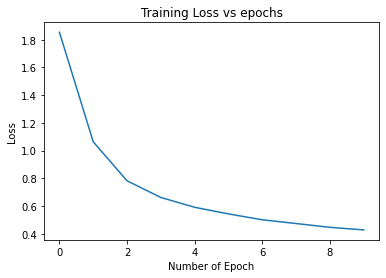

In [23]:
_,acc2 = model2.evaluate(test["x"],test["y"],batch_size = batch_Size, verbose=0)
print("Test accuracy: ",acc2*100)
loss_plot(history1,10)

## 3. different learning rates and performing exponential annealing on the learning rate.

### 3.(a) learning rates and exponential annealing

In [25]:
learning_rates =  [0.1, 0.01, 0.001]
exponential_loss = {}
history_3a = {}
models_3a = {}

In [26]:
lr_schedule = ExponentialDecay(0.1, decay_steps=100000, decay_rate=0.96, staircase=True)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
obj1=ANN()
input_dim=train["x"].shape[1]
model = obj1.MLP(input_dim)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
history = model.fit(train["x"],train["y"],epochs = 5, batch_size = batch_Size,validation_data = (valid["x"], valid["y"]))
models_3a["0.1"]=model
history_3a["0.1"]=history
exponential_loss["0.1"]=model.history.history['loss']
_, accr = models_3a["0.1"].evaluate(test["x"],test["y"],batch_size = batch_Size, verbose=0)
print("For Learning Rate = 0.1")
print()
print("Test accuracy when encoded data is used as input: ",accr*100)

Epoch 1/5
329/329 [==============================] - 2s 4ms/step - loss: 6.4894 - accuracy: 0.1641 - val_loss: 2.1671 - val_accuracy: 0.1549
Epoch 2/5
329/329 [==============================] - 1s 4ms/step - loss: 2.2561 - accuracy: 0.1285 - val_loss: 2.3266 - val_accuracy: 0.1838
Epoch 3/5
329/329 [==============================] - 1s 4ms/step - loss: 2.3023 - accuracy: 0.1291 - val_loss: 2.1736 - val_accuracy: 0.1601
Epoch 4/5
329/329 [==============================] - 1s 4ms/step - loss: 2.3397 - accuracy: 0.1319 - val_loss: 2.3076 - val_accuracy: 0.1108
Epoch 5/5
329/329 [==============================] - 1s 4ms/step - loss: 2.3076 - accuracy: 0.1064 - val_loss: 2.3099 - val_accuracy: 0.0993
For Learning Rate = 0.1

Test accuracy when encoded data is used as input:  9.589999914169312


In [27]:
lr_schedule = ExponentialDecay(0.01, decay_steps=100000, decay_rate=0.96, staircase=True)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
obj1=ANN()
input_dim=train["x"].shape[1]
model = obj1.MLP(input_dim)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
history = model.fit(train["x"],train["y"],epochs = 5, batch_size = batch_Size,validation_data = (valid["x"], valid["y"]))
models_3a["0.01"]=model
history_3a["0.01"]=history
exponential_loss["0.01"]=model.history.history['loss']
_, accr = models_3a["0.01"].evaluate(test["x"],test["y"],batch_size = batch_Size, verbose=0)
print("For Learning Rate = 0.01")
print()
print("Test accuracy when encoded data is used as input: ",accr*100)

Epoch 1/5
329/329 [==============================] - 2s 5ms/step - loss: 0.7328 - accuracy: 0.7710 - val_loss: 0.2359 - val_accuracy: 0.9387
Epoch 2/5
329/329 [==============================] - 1s 4ms/step - loss: 0.4014 - accuracy: 0.8897 - val_loss: 0.1931 - val_accuracy: 0.9484
Epoch 3/5
329/329 [==============================] - 1s 4ms/step - loss: 0.3586 - accuracy: 0.9050 - val_loss: 0.2007 - val_accuracy: 0.9464
Epoch 4/5
329/329 [==============================] - 1s 4ms/step - loss: 0.3705 - accuracy: 0.9030 - val_loss: 0.2020 - val_accuracy: 0.9469
Epoch 5/5
329/329 [==============================] - 1s 4ms/step - loss: 0.3477 - accuracy: 0.9096 - val_loss: 0.2163 - val_accuracy: 0.9442
For Learning Rate = 0.01

Test accuracy when encoded data is used as input:  94.7700023651123


In [28]:
lr_schedule = ExponentialDecay(0.001, decay_steps=100000, decay_rate=0.96, staircase=True)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
obj1=ANN()
input_dim=train["x"].shape[1]
model = obj1.MLP(input_dim)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
history = model.fit(train["x"],train["y"],epochs = 5, batch_size = batch_Size,validation_data = (valid["x"], valid["y"]))
models_3a["0.001"]=model
history_3a["0.001"]=history
exponential_loss["0.001"]=model.history.history['loss']
_, accr = models_3a["0.001"].evaluate(test["x"],test["y"],batch_size = batch_Size, verbose=0)
print("For Learning Rate = 0.001")
print()
print("Test accuracy when encoded data is used as input: ",accr*100)

Epoch 1/5
329/329 [==============================] - 2s 4ms/step - loss: 0.8496 - accuracy: 0.7225 - val_loss: 0.1868 - val_accuracy: 0.9447
Epoch 2/5
329/329 [==============================] - 1s 4ms/step - loss: 0.2544 - accuracy: 0.9246 - val_loss: 0.1374 - val_accuracy: 0.9599
Epoch 3/5
329/329 [==============================] - 1s 4ms/step - loss: 0.1823 - accuracy: 0.9441 - val_loss: 0.1169 - val_accuracy: 0.9653
Epoch 4/5
329/329 [==============================] - 1s 4ms/step - loss: 0.1488 - accuracy: 0.9554 - val_loss: 0.1008 - val_accuracy: 0.9708
Epoch 5/5
329/329 [==============================] - 1s 4ms/step - loss: 0.1306 - accuracy: 0.9591 - val_loss: 0.0972 - val_accuracy: 0.9709
For Learning Rate = 0.001

Test accuracy when encoded data is used as input:  97.14999794960022


# part 2

## MLP and autoencoder

In [41]:
train,test={},{}
(train["x"], train["y"]), (test["x"], test["y"]) = mnist.load_data()
input_shape=train["x"].shape[1:]
train["x"]=train["x"].reshape(train["x"].shape[0],train["x"].shape[1],train["x"].shape[2],1)
test["x"]=test["x"].reshape(test["x"].shape[0],test["x"].shape[1],test["x"].shape[2],1)
train["y"]=to_categorical(train["y"])
test["y"]=to_categorical(test["y"])
train["x"] = train["x"].astype('float32')
test["x"] = test["x"].astype('float32')
train["x"] = train["x"] / 255.0
test["x"] = test["x"] / 255.0
train["x"], valid["x"], train["y"], valid["y"]=train_test_split(train["x"], train["y"], test_size=0.3, random_state=42)
print(train["x"].shape)
print(test["x"].shape)
print(train["y"].shape)
print(test["y"].shape)
print(valid["x"].shape)
print(valid["y"].shape)

(42000, 28, 28, 1)
(10000, 28, 28, 1)
(42000, 10)
(10000, 10)
(18000, 28, 28, 1)
(18000, 10)


In [42]:
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        # Encoder of the Auto-encoder
        self.encoder = keras.models.Sequential()
        self.encoder.add(layers.Input(shape=(28, 28, 1)))
        self.encoder.add(layers.Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
        self.encoder.add(layers.Conv2D(2, kernel_size=(3, 3), activation='relu'))
        
        self.decoder = keras.models.Sequential()
        self.decoder.add(layers.Conv2DTranspose(2, kernel_size=(3,3), activation='relu'))  
        self.decoder.add(layers.Conv2DTranspose(8, kernel_size=(3,3), activation='relu'),)
        self.decoder.add(layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same'))
        
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded



In [43]:
ae = AutoEncoder()
ae.compile(optimizer='adam', loss=losses.MeanSquaredError())
ae.fit(train["x"], train["x"],epochs=20,batch_size=64,validation_data=(valid["x"],valid["x"]))

Epoch 1/20
657/657 [==============================] - 3s 4ms/step - loss: 0.0799 - val_loss: 0.0014
Epoch 2/20
657/657 [==============================] - 2s 4ms/step - loss: 0.0012 - val_loss: 8.2568e-04
Epoch 3/20
657/657 [==============================] - 2s 3ms/step - loss: 7.8948e-04 - val_loss: 6.4855e-04
Epoch 4/20
657/657 [==============================] - 2s 3ms/step - loss: 6.2837e-04 - val_loss: 5.5929e-04
Epoch 5/20
657/657 [==============================] - 2s 4ms/step - loss: 5.3947e-04 - val_loss: 4.8588e-04
Epoch 6/20
657/657 [==============================] - 2s 3ms/step - loss: 4.8362e-04 - val_loss: 4.4587e-04
Epoch 7/20
657/657 [==============================] - 2s 4ms/step - loss: 4.4055e-04 - val_loss: 4.1954e-04
Epoch 8/20
657/657 [==============================] - 2s 4ms/step - loss: 4.1874e-04 - val_loss: 3.9647e-04
Epoch 9/20
657/657 [==============================] - 2s 4ms/step - loss: 3.9623e-04 - val_loss: 3.9629e-04
Epoch 10/20
657/657 [===================

In [44]:
encoded_data_train = ae.encoder(train["x"]).numpy()
encoded_data_valid = ae.encoder(valid["x"]).numpy()
encoded_data_test = ae.encoder(test["x"]).numpy()

In [45]:
train_X=encoded_data_train.reshape(encoded_data_train.shape[0],encoded_data_train.shape[1]*encoded_data_train.shape[2]*encoded_data_train.shape[3])
valid_X=encoded_data_valid.reshape(encoded_data_valid.shape[0],encoded_data_valid.shape[1]*encoded_data_valid.shape[2]*encoded_data_valid.shape[3])
test_X=encoded_data_test.reshape(encoded_data_test.shape[0],encoded_data_test.shape[1]*encoded_data_test.shape[2]*encoded_data_test.shape[3])
print(train_X.shape)
print(test_X.shape)
print(valid_X.shape)
print(valid["y"].shape)
print(train["y"].shape)
print(test["y"].shape)

(42000, 1152)
(10000, 1152)
(18000, 1152)
(18000, 10)
(42000, 10)
(10000, 10)


In [46]:
obj1 = ANN()
input_dim=train_X.shape[1]
model2=obj1.MLP(input_dim)
loss_1='categorical_crossentropy'
opt='adam'
model2.compile(loss=loss_1, optimizer=opt, metrics=['accuracy'])
history1 = model2.fit(train_X, train["y"], epochs = 10, batch_size = 128, validation_data = (valid_X,valid["y"]))

Epoch 1/10
329/329 [==============================] - 2s 4ms/step - loss: 0.8421 - accuracy: 0.7222 - val_loss: 0.2051 - val_accuracy: 0.9361
Epoch 2/10
329/329 [==============================] - 1s 4ms/step - loss: 0.3019 - accuracy: 0.9062 - val_loss: 0.1524 - val_accuracy: 0.9546
Epoch 3/10
329/329 [==============================] - 1s 4ms/step - loss: 0.2294 - accuracy: 0.9303 - val_loss: 0.1329 - val_accuracy: 0.9592
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.2003 - accuracy: 0.9369 - val_loss: 0.1267 - val_accuracy: 0.9622
Epoch 5/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1893 - accuracy: 0.9428 - val_loss: 0.1154 - val_accuracy: 0.9645
Epoch 6/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1631 - accuracy: 0.9487 - val_loss: 0.1047 - val_accuracy: 0.9682
Epoch 7/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1558 - accuracy: 0.9516 - val_loss: 0.1067 - val_accuracy: 0.9678
Epoch 

In [47]:
_, accp2 = model2.evaluate(test_X,test["y"],batch_size = batch_Size, verbose=0)
print("Test accuracy when encoded data is used as input: ",accp2*100)

Test accuracy when encoded data is used as input:  97.54999876022339


In [38]:
train,test={},{}
(train["x"], train["y"]), (test["x"], test["y"]) = mnist.load_data()
train["y"] = to_categorical(train["y"])
test["y"] = to_categorical(test["y"])
input_size = train["x"].shape[1]*train["x"].shape[1]
train["x"] = np.reshape(train["x"],[-1,input_size])
test["x"] = np.reshape(test["x"],[-1,input_size])
train["x"] = train["x"].astype('float32')/255
test["x"] = test["x"].astype('float32')/255
train["x"], valid["x"], train["y"], valid["y"]=train_test_split(train["x"], train["y"], test_size=0.3, random_state=42)
obj = ANN()
input_dim=train["x"].shape[1]
model1=obj.MLP(input_dim)
loss_1='categorical_crossentropy'
opt='adam'
model1.compile(loss=loss_1, optimizer=opt, metrics=['accuracy'])
history1 = model1.fit(train["x"],train["y"],epochs = 10, batch_size = batch_Size, validation_data = (valid["x"],valid["y"]))

Epoch 1/10
329/329 [==============================] - 2s 4ms/step - loss: 0.8242 - accuracy: 0.7387 - val_loss: 0.1884 - val_accuracy: 0.9432
Epoch 2/10
329/329 [==============================] - 1s 4ms/step - loss: 0.2381 - accuracy: 0.9291 - val_loss: 0.1354 - val_accuracy: 0.9588
Epoch 3/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1784 - accuracy: 0.9443 - val_loss: 0.1142 - val_accuracy: 0.9656
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1490 - accuracy: 0.9559 - val_loss: 0.1011 - val_accuracy: 0.9704
Epoch 5/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1276 - accuracy: 0.9615 - val_loss: 0.0967 - val_accuracy: 0.9711
Epoch 6/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1104 - accuracy: 0.9657 - val_loss: 0.0882 - val_accuracy: 0.9734
Epoch 7/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1027 - accuracy: 0.9696 - val_loss: 0.0873 - val_accuracy: 0.9739
Epoch 

In [39]:
_,acc1 = model1.evaluate(test["x"],test["y"],batch_size = 128, verbose=0)
print("Test accuracy on raw data: ",acc1*100)

Test accuracy on raw data:  97.75999784469604


# **Compare both the accuracy scores.**

In [51]:
table = [['MODEL', 'ACCURACY'], ['When raw data is used as input',str(acc1*100)+"%"], ['When encoded data is used as input',str(accp2*100)+"%"]]
from tabulate import tabulate
print(tabulate(table, headers='firstrow'))

MODEL                               ACCURACY
----------------------------------  ------------------
When raw data is used as input      97.75999784469604%
When encoded data is used as input  97.54999876022339%
